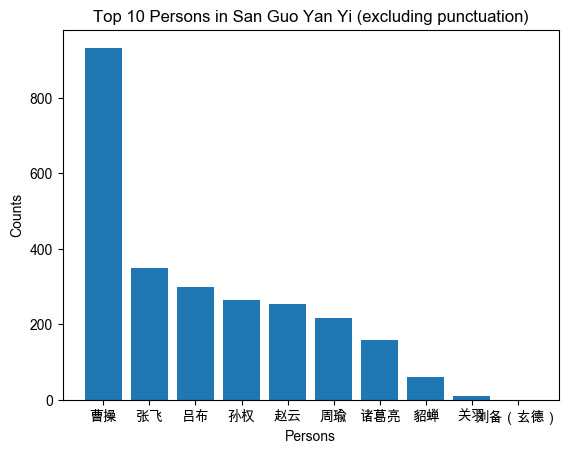

In [10]:
from collections import Counter
import jieba
import string
import re
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial Unicode MS'

# 读取文本文件
with open("/Users/alpha/Downloads/sgyy.txt", "r", encoding="utf-8") as f:
    text = f.read()

# 使用jieba进行分词，排除标点符号
words = []
for word in jieba.lcut(text, cut_all=False):
    # 只保留中文、数字、英文大小写字母等字符
    if re.match(r"[\u4e00-\u9fa5a-zA-Z0-9]+", word):
        words.append(word)

# 将人名添加到一个列表中
person_names = ["曹操", "刘备（玄德）", "孙权", "关羽", "张飞", "赵云", "诸葛亮", "周瑜", "吕布", "貂蝉"]

# 统计人物出现的次数
counter = Counter(words)
person_counter = {name: 0 for name in person_names}
for name in person_names:
    person_counter[name] = counter[name] + counter[name + "，"] + counter[name + "。"] + counter[name + "！"] + counter[name + "？"]

# 对人物出现次数进行排序并获取前十个人物
top10_persons = sorted(person_counter.items(), key=lambda x: x[1], reverse=True)[:10]

# 绘制直方图
plt.bar([p[0] for p in top10_persons], [p[1] for p in top10_persons])
plt.title("Top 10 Persons in San Guo Yan Yi (excluding punctuation)")
plt.xlabel("Persons")
plt.ylabel("Counts")
plt.show()
